In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error


In [18]:
pd.set_option('future.no_silent_downcasting', True)
sns.set_theme()

In [19]:
calories = pd.read_csv("16_CaloriesBurnt_Prediction_Calories.csv")
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [20]:
exercise = pd.read_csv("16_CaloriesBurnt_Prediction_Exercise.csv")
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [21]:
data = exercise.merge(calories, how = 'inner', on = 'User_ID')
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [23]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [24]:
data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

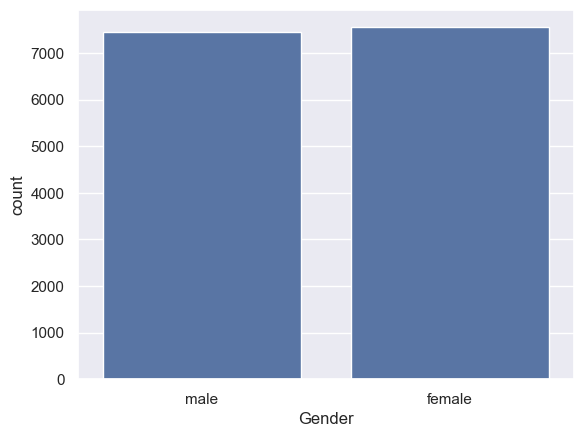

In [25]:
sns.countplot(x = 'Gender', data = data)
plt.show()

In [26]:
data['Gender'] = data['Gender'].replace({
    "female" : 0, "male" : 1
})

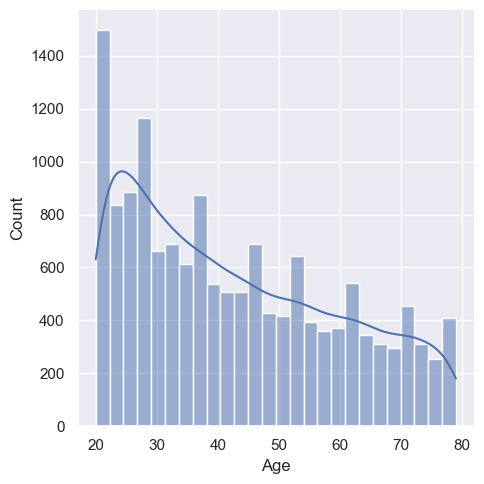

In [27]:
sns.displot(data["Age"], kde = True)
plt.show()

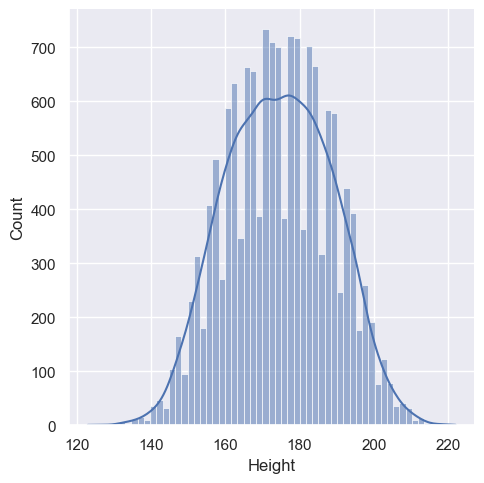

In [30]:
sns.displot(data["Height"], kde = True)
plt.show()

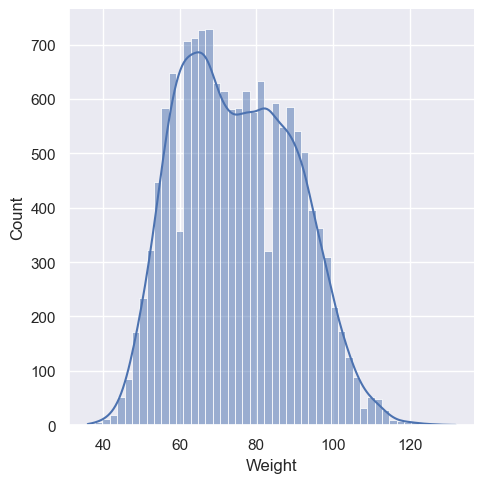

In [31]:
sns.displot(data["Weight"], kde = True)
plt.show()

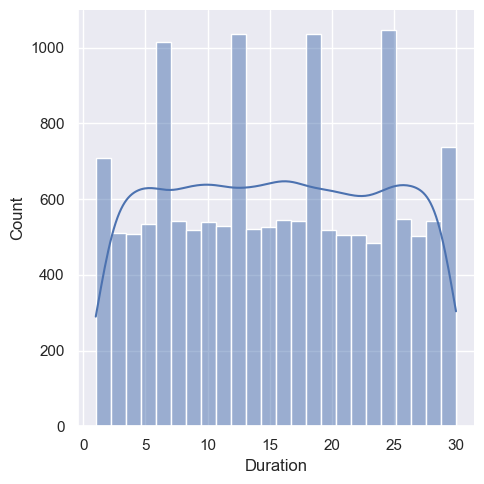

In [33]:
sns.displot(data["Duration"], kde = True)
plt.show()

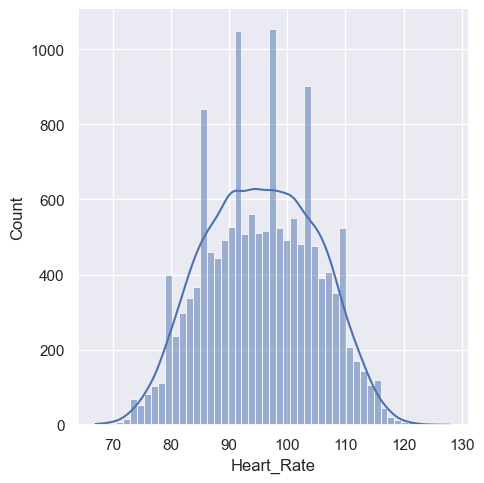

In [36]:
sns.displot(data["Heart_Rate"], kde = True)
plt.show()

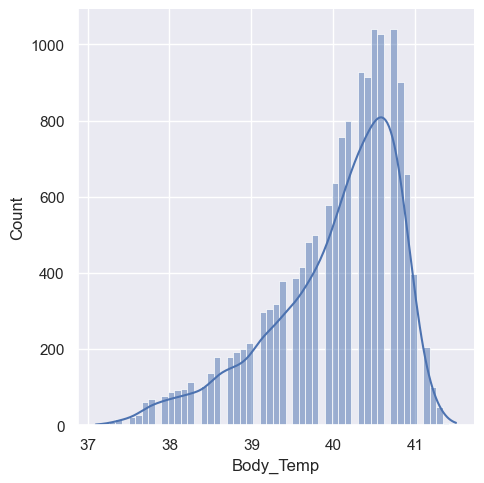

In [37]:
sns.displot(data["Body_Temp"], kde = True)
plt.show()

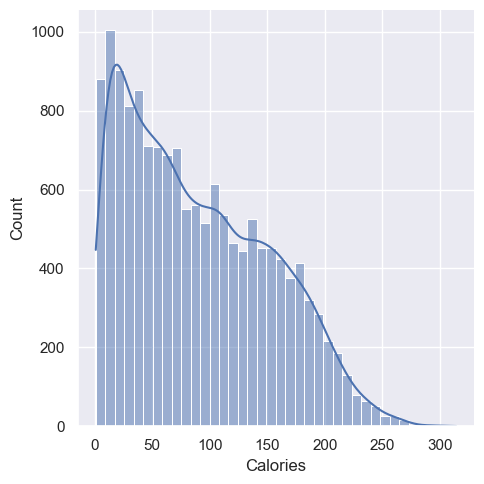

In [38]:
sns.displot(data["Calories"], kde = True)
plt.show()

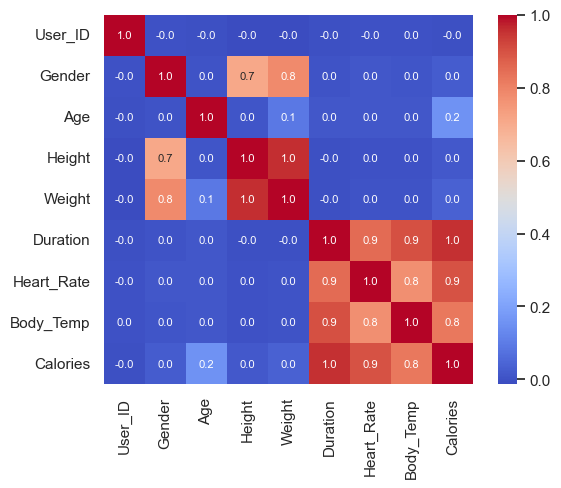

In [39]:
sns.heatmap(data = data.corr(), square = True, annot = True, annot_kws = {'size' : 8}, fmt = '.1f', cbar = True, cmap = 'coolwarm')
plt.show()

In [40]:
X = data.drop(columns = ["Calories", "User_ID"], axis = 1).values
Y = data["Calories"].values

In [41]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [44]:
model = XGBRegressor(random_state = 5)

In [45]:
model.fit(xTrain, yTrain)

c:\Users\Tarun V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=5, ...)

In [46]:
#Training Evaluation
prediction = model.predict(xTrain)
error = root_mean_squared_error(yTrain, prediction)

print(error)

1.3012838025544413


In [47]:
#Test Evaluation
prediction = model.predict(xTest)
error = root_mean_squared_error(yTest, prediction)

print(error)

2.1212454093243505
